# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [6]:
library(tidyverse)
library(Rtsne)
library(dplyr)

## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [ ]:
wine <- read_csv("/Users/ericyao/Desktop/Workspace/BIOS512/data/5-1/wine.csv")

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
head(wine)
summary(wine)
spec(wine)
wine%>%
    select(where(is.numeric))%>%
    summary()

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

cols(
  Alcohol = col_double(),
  Malicacid = col_double(),
  Ash = col_double(),
  Alcalinity_of_ash = col_double(),
  Magnesium = col_double(),
  Total_phenols = col_double(),
  Flavanoids = col_double(),
  Nonflavanoid_phenols = col_double(),
  Proanthocyanins = col_double(),
  Color_intensity = col_double(),
  Hue = col_double(),
  `0D280_0D315_of_diluted_wines` = col_double(),
  Proline = col_double(),
  class = col_double()
)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [29]:
prep <- wine %>%
    mutate(across(-c("class"), ~as.numeric(scale(.))))

summary(prep)
head(prep)

    Alcohol           Malicacid            Ash           Alcalinity_of_ash  
 Min.   :-2.42739   Min.   :-1.4290   Min.   :-3.66881   Min.   :-2.663505  
 1st Qu.:-0.78603   1st Qu.:-0.6569   1st Qu.:-0.57051   1st Qu.:-0.687199  
 Median : 0.06083   Median :-0.4219   Median :-0.02375   Median : 0.001514  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.83378   3rd Qu.: 0.6679   3rd Qu.: 0.69614   3rd Qu.: 0.600395  
 Max.   : 2.25341   Max.   : 3.1004   Max.   : 3.14745   Max.   : 3.145637  
   Magnesium       Total_phenols        Flavanoids      Nonflavanoid_phenols
 Min.   :-2.0824   Min.   :-2.10132   Min.   :-1.6912   Min.   :-1.8630     
 1st Qu.:-0.8221   1st Qu.:-0.88298   1st Qu.:-0.8252   1st Qu.:-0.7381     
 Median :-0.1219   Median : 0.09569   Median : 0.1059   Median :-0.1756     
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000     
 3rd Qu.: 0.5082   3rd Qu.: 0.80672   3rd Qu.: 0.8467   3rd Qu.: 0.6078     

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.5143408,-0.56066822,0.2313998,-1.1663032,1.90852151,0.8067217,1.0319081,-0.6577078,1.2214385,0.2510088,0.3611585,1.8427215,1.01015939,1
0.2455968,-0.49800856,-0.8256672,-2.4838405,0.01809398,0.5670481,0.7315653,-0.8184106,-0.5431887,-0.2924962,0.4049085,1.1103172,0.96252635,1
0.1963252,0.02117152,1.1062139,-0.2679823,0.08810981,0.8067217,1.2121137,-0.4970050,2.1299594,0.2682629,0.3174085,0.7863692,1.39122370,1
1.6867914,-0.34583508,0.4865539,-0.8069748,0.92829983,2.4844372,1.4623994,-0.9791134,1.0292513,1.1827317,-0.4263410,1.1807407,2.32800680,1
0.2948684,0.22705328,1.8352256,0.4506745,1.27837900,0.8067217,0.6614853,0.2261576,0.4002753,-0.3183774,0.3611585,0.4483365,-0.03776747,1
1.4773871,-0.51591132,0.3043010,-1.2860793,0.85828399,1.5576991,1.3622851,-0.1755994,0.6623487,0.7298108,0.4049085,0.3356589,2.23274072,1


Based on what we saw in the summary statistic table from the importad data, scaling and centering this data when we perform principal component analysis because the original data had different ranges and different means. This makes it hard to have PCA that would accurately reflect the data. Scaling allows for proper comparability. All the values now are centered around a mean of zero.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [18]:
results <- prcomp(prep)
summary(results)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

b) PC1 encompasses 0.3821 of the total variance and we see that PC2 encompasses 0.1836 of the total variance 

c) We are doing a PCA first because it helps by reducing the dimensions and allows us to plot data in 2 dimensions or 3 dimensions depending on the comparisons. It allows for th understanding of the data graphically. We find a rotation that aligns axes to decrease variation in the data 

In [22]:
results$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Alcohol,-0.139554110,-0.483986584,-0.2073937774,-0.05202454,0.26128775,0.16536102,0.08109663,0.41085968,-0.48056233,0.26657031,-0.22307817,-0.265240813,0.02620159,-0.082231639
Malicacid,0.231278771,-0.224052306,0.0888801156,0.50792619,0.09224016,0.58008658,-0.38986636,0.07811783,0.03061612,-0.32214644,0.07118746,0.120491970,-0.04853550,0.025647729
Ash,-0.000758731,-0.315929724,0.6261495205,-0.23483910,0.12056093,0.12592437,0.16145692,-0.17151142,0.28629906,-0.08144576,-0.49601658,-0.047383556,0.17320790,-0.014819695
Alcalinity_of_ash,0.230293094,0.011263089,0.6120248225,0.06750549,-0.05695664,-0.09534441,0.27494282,0.42011625,-0.15910053,0.11386621,0.47628860,-0.058460009,-0.15775842,0.099229101
Magnesium,-0.131041028,-0.300236426,0.1308963493,-0.25528136,-0.75961835,0.10479264,-0.32783323,-0.15219546,-0.26275246,0.10095846,0.07123668,0.061706989,-0.05861093,-0.013969977
Total_phenols,-0.372792367,-0.066404359,0.1463803150,0.19504272,0.14215523,-0.12544691,0.03482640,-0.38223991,-0.35387300,-0.32340394,0.29983404,-0.302432020,0.41707864,0.169545891
Flavanoids,-0.403237284,0.002017377,0.1508538950,0.14885364,0.10784345,-0.04674972,0.06557152,-0.18072307,-0.07250367,-0.15083796,-0.02996008,-0.046369111,-0.71106740,-0.452804254
Nonflavanoid_phenols,0.278847444,-0.027604752,0.1701277248,-0.27078415,0.47058669,-0.25340042,-0.60671679,-0.23206171,-0.17571862,0.23033372,0.12026342,0.042506815,-0.08908413,-0.058790535
Proanthocyanins,-0.291925075,-0.040561908,0.1497147503,0.43527140,-0.12361143,-0.49254225,-0.40687583,0.35471193,0.24105395,0.12403042,-0.23448023,-0.094480759,0.11423370,0.039562012
Color_intensity,0.089426322,-0.529856997,-0.1372817801,0.06919472,0.05497895,-0.42598886,0.19989161,-0.03762399,-0.06894372,-0.24930845,0.02389587,0.601198625,-0.08479641,0.160155281


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
-3.432664,-1.4457084,-0.1646967,-0.1113720,-0.7217831,0.2736709,-0.58025133,-0.05970499,-0.54038984,1.046853883,-0.4300270,0.545204461,0.20084579,-0.18528549
-2.398976,0.3302489,-2.0209094,-0.3578727,0.2890441,0.9049342,0.00246233,-1.01469912,0.26593512,0.056482523,-0.1340048,0.390437182,0.08016393,-0.10636063
-2.672832,-1.0320368,0.9803100,0.6968407,0.3178178,-0.4955014,-0.46681092,0.30100865,1.20763179,0.001472536,-0.2809310,0.001220295,-0.02854539,0.06296143
-3.846566,-2.7563678,-0.1749490,0.5670774,0.3059925,-0.2099894,0.39299158,-0.62845671,-0.08316195,0.156146471,0.7668835,-0.235961521,0.45395455,-0.06415490
-1.249386,-0.8660395,2.0204630,-0.4253333,-0.2430086,0.5289350,-0.44621645,-0.42606864,-0.29347280,0.036804728,-0.5323731,-0.220935896,-0.13349634,0.47636781
-3.186757,-2.1215204,-0.6273790,-0.5678750,0.5141357,-0.2028466,-0.38527555,-0.37842340,0.09625250,-0.173023948,0.4059346,-0.377064405,-0.05291243,-0.20007806


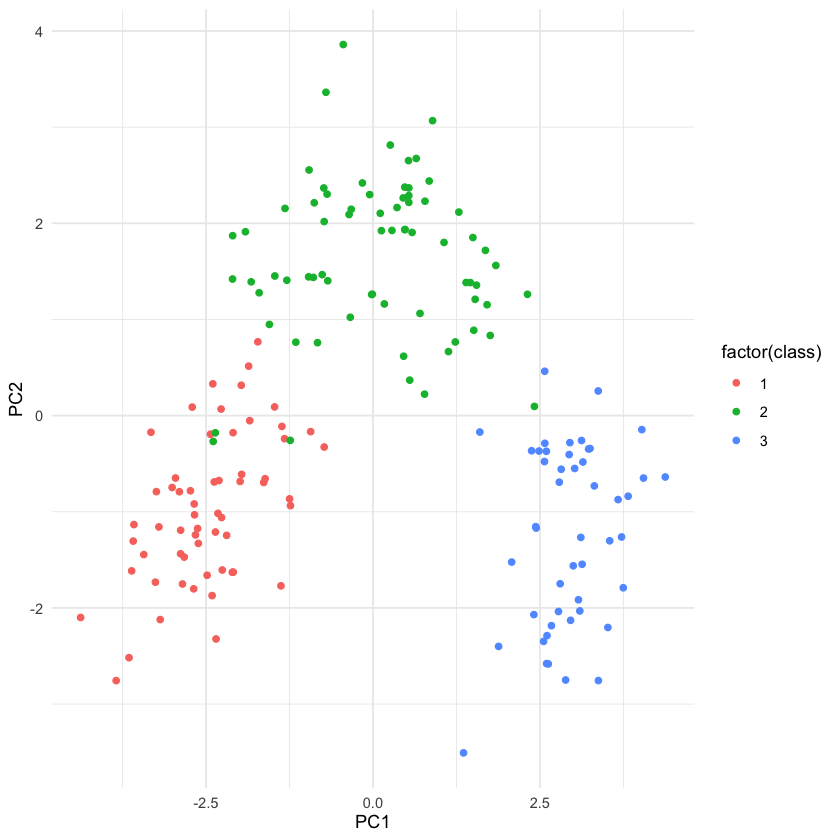

In [36]:
head(results$x)

plt <- as.data.frame(results$x)%>%
    select(c("PC1","PC2"))%>%
    mutate(class = prep$class)%>%
    ggplot(aes(x = PC1, y = PC2, col= factor(class)))+
        geom_point()+
        theme_minimal()

plt




f) I see that they are clustered very clearly by class. This means the two components can effectively show the differences between the wine classes. 

g)Dimensionality reduction would fail if the data has the same variance for every variable, meaning you wouldn't be able to reduce it down because every side would be exactly the same variance.

h) a vector space is a set V along with a field F such that the following axioms are met: association of addition, commutativity of addition, additive and inverse indentities, associative scalar multiplication, multiplicative identity, distribution over a vector and field addition. A manifold is a set the has the property that it resembles a vector space locally. However, a manifold is more general and can take up different shapes/curves that a vector space cannot because a vector space assumes a linear subspace. T-SNE assumes a nonlinear manifold and adheres to the curved geometry that a vector space cannot.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



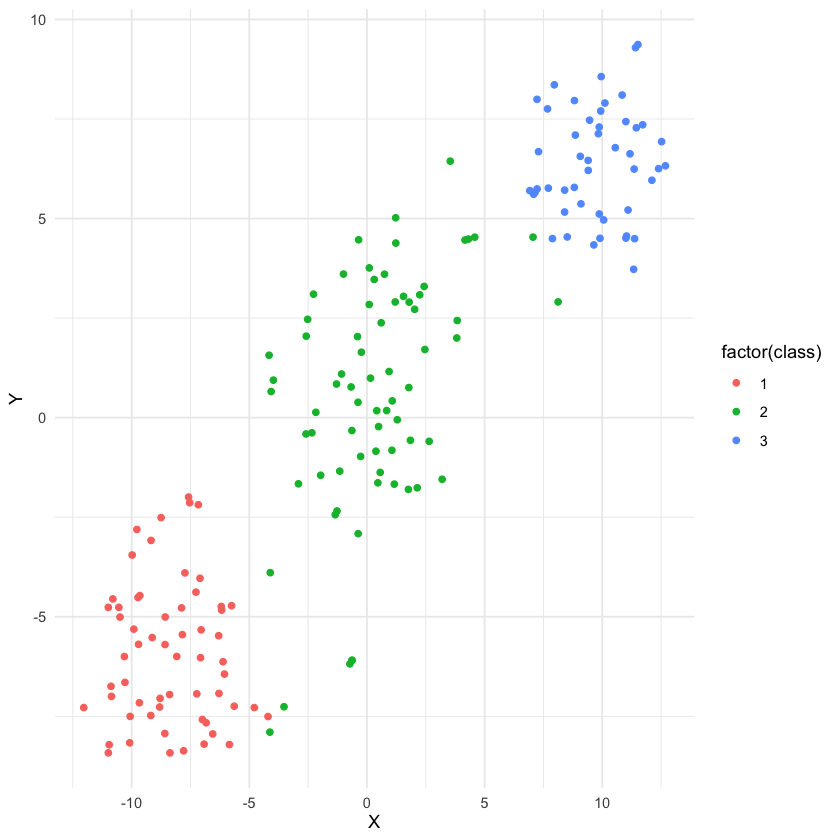

In [46]:
set.seed(123)
tsne <- as.data.frame(results$x)%>%
    select(1:10)%>%
    mutate(class = prep$class)%>%
    distinct()

tsne_out <- Rtsne(tsne %>% select(-class), dims = 2, perplexity =30 )

tsne_df <- data.frame(
    X = tsne_out$Y[,1],
    Y = tsne_out$Y[,2],
    class = tsne$class
)

tsneplt <- ggplot(tsne_df, aes(X,Y, color = factor(class)))+
                geom_point() +
                theme_minimal()
tsneplt

c) we don't stop at PCA because PCA assumes linear relationships. Many times you miss any non-linear structure or patterns if you only assume linearity. T-SNE allows you to look at relationships that may not only be linear and helps visualize it in 2D

d) Other types of data that this workflow makes sense for are datasets of highdimensionality that may have more than just a simple structure. One example could potentially be with looking at gene data.